## Drug Classification Using KNN and Multiclass Logistic Regression

In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Loading dataset
data = pd.read_csv("C:/Users/Souradeep/OneDrive/Desktop/Data Science/Kaggle Datasets/Drug.csv")
data.head()

,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,F,HIGH,HIGH,0.792535,0.031258,drugY
1,47,M,LOW,HIGH,0.739309,0.056468,drugC
2,47,M,LOW,HIGH,0.697269,0.068944,drugC
3,28,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,61,F,LOW,HIGH,0.559294,0.030998,drugY


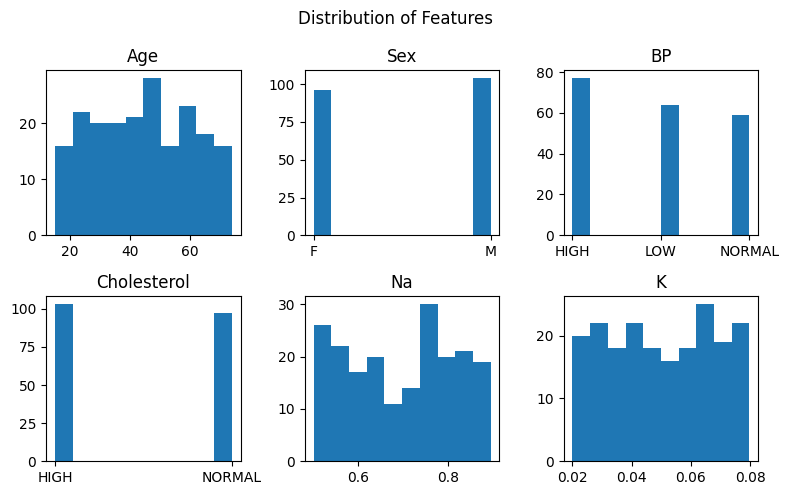

In [8]:
# Distribution of Features
plt.figure(figsize = (8, 5))
plt.subplot(2,3,1)
plt.hist(data.Age)
plt.title("Age")
plt.subplot(2,3,2)
plt.hist(data.Sex)
plt.title("Sex")
plt.subplot(2,3,3)
plt.hist(data.BP)
plt.title("BP")
print(" ")
plt.subplot(2,3,4)
plt.hist(data.Cholesterol)
plt.title("Cholesterol")
plt.subplot(2,3,5)
plt.hist(data.Na)
plt.title("Na")
plt.subplot(2,3,6)
plt.hist(data.K)
plt.title("K")
plt.suptitle("Distribution of Features")
plt.tight_layout()
plt.show()

In [10]:
# List of Unique Drugs
data.Drug.unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

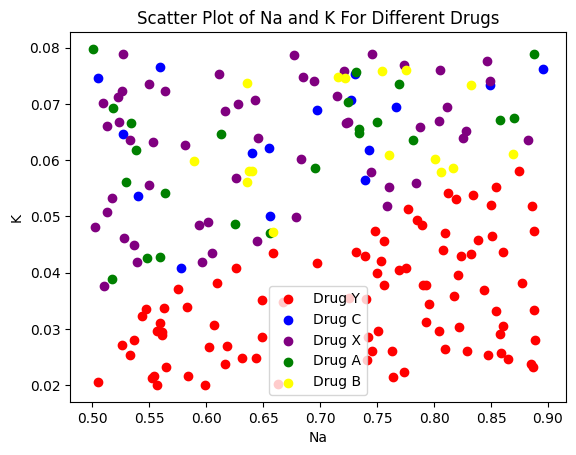

In [12]:
# Scatter Plot of Na and K for each drug
drug_y = data[data.Drug == 'drugY']
drug_c = data[data.Drug == 'drugC']
drug_x = data[data.Drug == 'drugX']
drug_a = data[data.Drug == 'drugA']
drug_b = data[data.Drug == 'drugB']
plt.scatter(drug_y.Na, drug_y.K, color = 'red', label = "Drug Y")
plt.scatter(drug_c.Na, drug_c.K, color = 'blue', label = "Drug C")
plt.scatter(drug_x.Na, drug_x.K, color = 'purple', label = "Drug X")
plt.scatter(drug_a.Na, drug_a.K, color = 'green', label = "Drug A")
plt.scatter(drug_b.Na, drug_b.K, color = 'yellow', label = "Drug B")
plt.xlabel("Na")
plt.ylabel("K")
plt.title("Scatter Plot of Na and K For Different Drugs")
plt.legend()
plt.show()

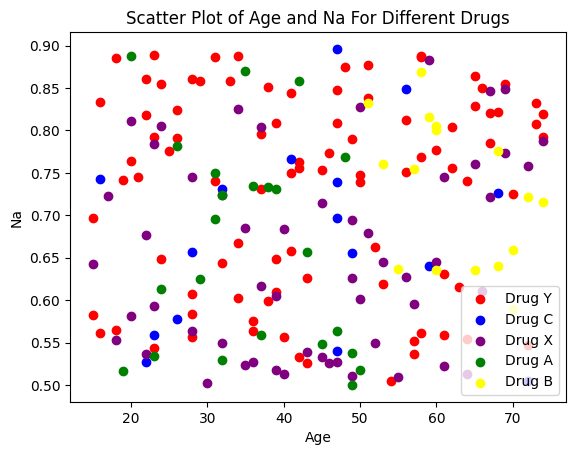

In [13]:
# Scatter Plot of Age and Na for each drug
drug_y = data[data.Drug == 'drugY']
drug_c = data[data.Drug == 'drugC']
drug_x = data[data.Drug == 'drugX']
drug_a = data[data.Drug == 'drugA']
drug_b = data[data.Drug == 'drugB']
plt.scatter(drug_y.Age, drug_y.Na, color = 'red', label = "Drug Y")
plt.scatter(drug_c.Age, drug_c.Na, color = 'blue', label = "Drug C")
plt.scatter(drug_x.Age, drug_x.Na, color = 'purple', label = "Drug X")
plt.scatter(drug_a.Age, drug_a.Na, color = 'green', label = "Drug A")
plt.scatter(drug_b.Age, drug_b.Na, color = 'yellow', label = "Drug B")
plt.xlabel("Age")
plt.ylabel("Na")
plt.title("Scatter Plot of Age and Na For Different Drugs")
plt.legend()
plt.show()

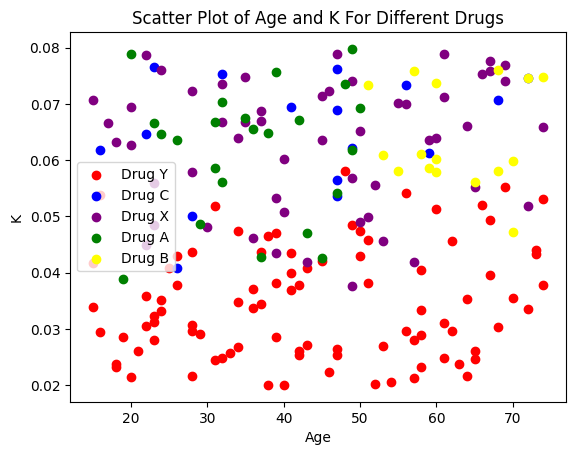

In [14]:
# Scatter Plot of Age and K for each drug
drug_y = data[data.Drug == 'drugY']
drug_c = data[data.Drug == 'drugC']
drug_x = data[data.Drug == 'drugX']
drug_a = data[data.Drug == 'drugA']
drug_b = data[data.Drug == 'drugB']
plt.scatter(drug_y.Age, drug_y.K, color = 'red', label = "Drug Y")
plt.scatter(drug_c.Age, drug_c.K, color = 'blue', label = "Drug C")
plt.scatter(drug_x.Age, drug_x.K, color = 'purple', label = "Drug X")
plt.scatter(drug_a.Age, drug_a.K, color = 'green', label = "Drug A")
plt.scatter(drug_b.Age, drug_b.K, color = 'yellow', label = "Drug B")
plt.xlabel("Age")
plt.ylabel("K")
plt.title("Scatter Plot of Age and K For Different Drugs")
plt.legend()
plt.show()

In [15]:
# Encoding Categorical and Ordinal features
ordinal_encoder = OrdinalEncoder()
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Drug'] = label_encoder.fit_transform(data['Drug'])
data[['BP', 'Cholesterol']] = ordinal_encoder.fit_transform(data[['BP', 'Cholesterol']])
data.head()

,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,0,0.0,0.0,0.792535,0.031258,4
1,47,1,1.0,0.0,0.739309,0.056468,2
2,47,1,1.0,0.0,0.697269,0.068944,2
3,28,0,2.0,0.0,0.563682,0.072289,3
4,61,0,1.0,0.0,0.559294,0.030998,4


In [16]:
# Defining features and target
X = data.drop('Drug', axis = 1)
y = data['Drug']

In [17]:
# Splitting data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [18]:
# Scaling Train and Test features
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Fitting Multiclass Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [20]:
# Model Score on Train Data
log_reg.score(X_train_scaled, y_train)

0.91875

In [21]:
# Model Score on Test Data
log_reg.score(X_test_scaled, y_test)

0.875

In [22]:
# Predicted Values of Target
y_pred = log_reg.predict(X_test_scaled)
label_encoder.inverse_transform(y_pred)

array(['drugX', 'drugX', 'drugX', 'drugY', 'drugB', 'drugY', 'drugX',
       'drugX', 'drugY', 'drugY', 'drugX', 'drugA', 'drugY', 'drugY',
       'drugY', 'drugA', 'drugY', 'drugX', 'drugY', 'drugA', 'drugY',
       'drugX', 'drugX', 'drugY', 'drugY', 'drugX', 'drugB', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugX', 'drugX', 'drugY', 'drugX',
       'drugY', 'drugB', 'drugA', 'drugY', 'drugX'], dtype=object)

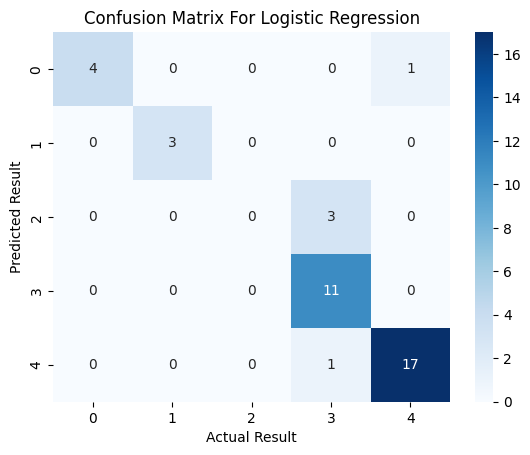

In [25]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'Blues')
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
plt.title("Confusion Matrix For Logistic Regression")
plt.show()

In [27]:
# Classification Report
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         3
           3       0.73      1.00      0.85        11
           4       0.94      0.94      0.94        18

    accuracy                           0.88        40
   macro avg       0.74      0.75      0.74        40
weighted avg       0.83      0.88      0.84        40



The optimal value of K is 18 and the minimum error is 0.15


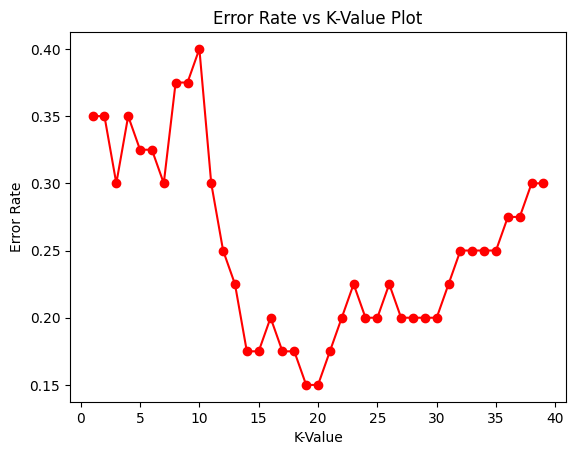

In [29]:
# K-Value Optimization
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    error_rate.append(np.mean(y_pred != y_test))
plt.plot([i for i in range(1, 40)], error_rate, color = 'red', marker = 'o')
plt.xlabel("K-Value")
plt.ylabel("Error Rate")
plt.title("Error Rate vs K-Value Plot")
print(f"The optimal value of K is {error_rate.index(min(error_rate))} and the minimum error is {min(error_rate)}")

In [30]:
# Fitting KNN Model
knn = KNeighborsClassifier(n_neighbors = 18)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=18)

In [31]:
# Model Score on Train Data
knn.score(X_train_scaled, y_train)

0.8

In [32]:
# Model Score on Test Data
knn.score(X_test_scaled, y_test)

0.825

In [33]:
# Predicted Values of Target
y_pred = knn.predict(X_test_scaled)
label_encoder.inverse_transform(y_pred)

array(['drugX', 'drugB', 'drugX', 'drugY', 'drugB', 'drugY', 'drugX',
       'drugX', 'drugY', 'drugY', 'drugX', 'drugA', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugX', 'drugA', 'drugY',
       'drugX', 'drugX', 'drugY', 'drugY', 'drugB', 'drugB', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugX', 'drugX', 'drugY', 'drugX',
       'drugY', 'drugB', 'drugA', 'drugY', 'drugX'], dtype=object)

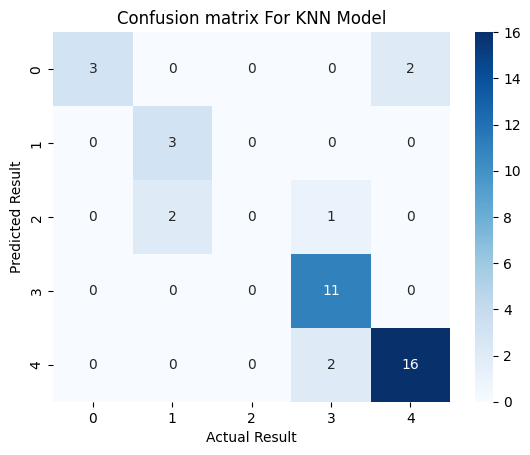

In [34]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'Blues')
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
plt.title("Confusion matrix For KNN Model")
plt.show()